In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [4]:
dataset=pd.read_csv('Dati_Tutto_190405/CSV/Soddisfazione Clienti.csv')

In [5]:
#dataset.head()

In [6]:
#cleaning dei dati

In [7]:
domande=['Come valutate il rapporto qualità/prezzo dei prodotti ALCAS?', 
         'Come valutate il rapporto qualità/prezzo dei prodotti ALCAS rispetto alla concorrenza?', 
         'Quanto è importante il prezzo per la sua azienda nella scelta di questo tipo di prodotto?', 
         'Qual''è la vostra valutazione dei tempi di consegna rispetto alle vostre esigenze?', 
         'Qual''è la vostra valutazione del materiale di supporto tecnico e normativo fornito?', 
         'Come ritenete la capacità di ALCAS di gestire le richieste del cliente?', 
         'Come giudica la qualità di nostri prodotti?', 
         'Nel complesso, come valuta la sua esperienza con l''assistenza clienti?', 
         'Come valutate la tempestività di ALCAS nella gestione di azioni correttive e di miglioramento?', 
         'Da quanto tempo siete clienti della nostra azienda?']

In [8]:
dataset=dataset.drop([0])
dataset=dataset.drop(['respondent_id', 'collector_id', 'ip_address', 'custom_1'], axis=1)
dataset.columns=["date_created","date_modified","email_address","RagioneSociale","CodiceCliente","Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10"]
dataset=dataset.reset_index()
dataset=dataset.drop(['index'], axis=1)
dataset['CodiceCliente']=dataset['CodiceCliente'].str[11:]

In [9]:
#dataset.head()

In [10]:
#lista valori per le varie domande
#print(list(dataset["Q1"].unique()))
#print(list(dataset["Q2"].unique()))
#print(list(dataset["Q3"].unique()))
#print(list(dataset["Q4"].unique()))
#print(list(dataset["Q5"].unique()))
#print(list(dataset["Q6"].unique()))
#print(list(dataset["Q7"].unique()))
#print(list(dataset["Q8"].unique()))
#print(list(dataset["Q9"].unique()))
#print(list(dataset["Q10"].unique()))

In [11]:
#trasformare Q1... in ordinali
ordered_satisfaction = {'Molto insoddisfacente':0, 'Insoddisfacente':1, 'Abbastanza soddisfacente':2, 'Soddisfacente':3, 'Molto soddisfacente':4}
inv_ordered_satisfaction = {v:k for k, v in ordered_satisfaction.items()}
dataset['Q1']=dataset['Q1'].map(ordered_satisfaction) 
dataset['Q2']=dataset['Q2'].map(ordered_satisfaction) 
dataset['Q4']=dataset['Q4'].map(ordered_satisfaction) 
dataset['Q5']=dataset['Q5'].map(ordered_satisfaction) 
dataset['Q6']=dataset['Q6'].map(ordered_satisfaction) 
dataset['Q9']=dataset['Q9'].map(ordered_satisfaction) 

In [12]:
#trasformare Q3... in ordinali
ordered_satisfaction_Q3 = {'Per nulla importante':0, 'Non tanto importante':1, 'Abbastanza importante':2, 'Molto importante':3, 'Estremamente importante':4}
inv_ordered_satisfaction_Q3 = {v:k for k, v in ordered_satisfaction_Q3.items()}
dataset['Q3']=dataset['Q3'].map(ordered_satisfaction_Q3) 

In [13]:
#trasformare Q7... in ordinali
ordered_satisfaction_Q7 = {'Bassissima qualità':0, 'Bassa qualità':1, 'Media qualità':2, 'Alta qualità':3, 'Altissima qualità':4}
inv_ordered_satisfaction_Q7 = {v:k for k, v in ordered_satisfaction_Q7.items()}
dataset['Q7']=dataset['Q7'].map(ordered_satisfaction_Q7) 

In [14]:
#trasformare Q8... in ordinali
ordered_satisfaction_Q8 = {'Molto negativa':0, 'Abbastanza negativa':1, 'Neutra':2, 'Abbastanza positiva':3, 'Molto positiva':4}
inv_ordered_satisfaction_Q8 = {v:k for k, v in ordered_satisfaction_Q8.items()}
dataset['Q8']=dataset['Q8'].map(ordered_satisfaction_Q8) 

In [15]:
#trasformare Q10... in ordinali
ordered_satisfaction_Q10 = {'Meno di sei mesi':0, 'Da sei mesi a un anno':1, '1 - 3 anni':2, 'Più di 3 anni':3}
inv_ordered_satisfaction_Q10 = {v:k for k, v in ordered_satisfaction_Q10.items()}
dataset['Q10']=dataset['Q10'].map(ordered_satisfaction_Q10) 

In [16]:
#dataset.head()

In [17]:
#dataset.describe()

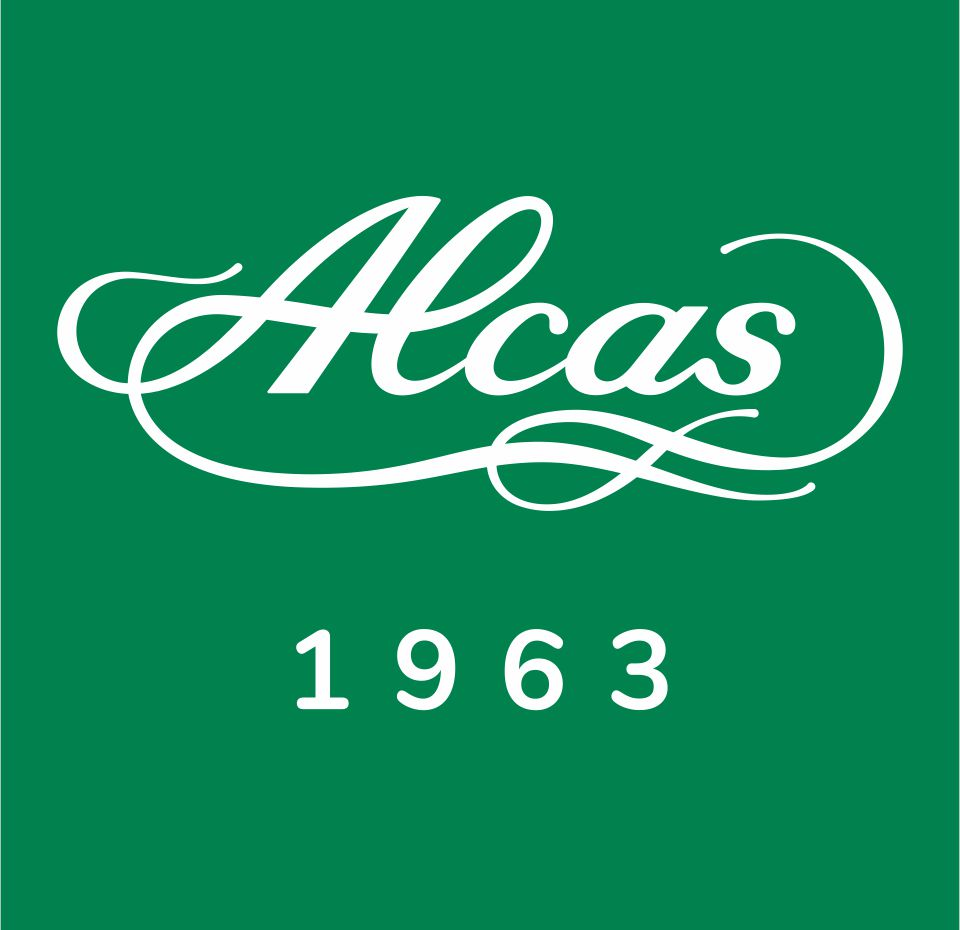

In [18]:
PATH = "/Users/alessio/Dropbox/ALCAS/SMART_FACTORY/QUALITY_SURVEY/CLUSTERING/"
Image(filename = PATH + "logo alcas.jpg", width=100, height=100)

# <font color='green'>Alcas s.p.a.</font>

## Questionario sulla soddisfazione dei clienti 2019

### Il questinoario è stato proposto ai clienti nazionali ponendo 10 domande sulla qualità dei prodotti e dei servizi offerti.

Le domande proposte sono state le seguenti:
- Come valutate il rapporto qualità/prezzo dei prodotti ALCAS?
- Come valutate il rapporto qualità/prezzo dei prodotti ALCAS rispetto alla concorrenza?
- Quanto è importante il prezzo per la sua azienda nella scelta di questo tipo di prodotto?
- Qual''è la vostra valutazione dei tempi di consegna rispetto alle vostre esigenze?
- Qual''è la vostra valutazione del materiale di supporto tecnico e normativo fornito?
- Come ritenete la capacità di ALCAS di gestire le richieste del cliente?
- Come giudica la qualità di nostri prodotti?'
- Nel complesso, come valuta la sua esperienza con l''assistenza clienti?
- Come valutate la tempestività di ALCAS nella gestione di azioni correttive e di miglioramento?
- Da quanto tempo siete clienti della nostra azienda?

In [19]:
#dataset.count()

In [20]:
print("Hanno risposto " + str(dataset['CodiceCliente'].count()) + " su 2663 clienti.")

Hanno risposto 384 su 2663 clienti.


## Analisi statistica sulle risposte al questionario

### Domanda n.1
#### __ Come valutate il rapporto qualità/prezzo dei prodotti ALCAS? __

In [21]:
u, inv = np.unique(dataset['Q1'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

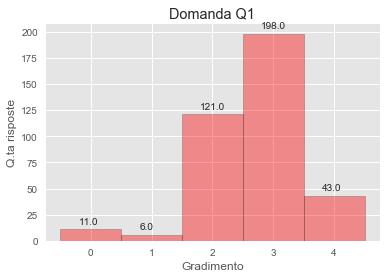

In [22]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q1'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='red')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q1')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [23]:
print("Domanda Q1: " + domande[0])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q1'].count()))
print("Media: " + str(round(dataset['Q1'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q1'].std(),2)))


Domanda Q1: Come valutate il rapporto qualità/prezzo dei prodotti ALCAS?
Possibili risposte:
	0. Molto insoddisfacente --> 11.0
	1. Insoddisfacente --> 6.0
	2. Abbastanza soddisfacente --> 121.0
	3. Soddisfacente --> 198.0
	4. Molto soddisfacente --> 43.0

Clienti che hanno risposto: 379
Media: 2.68
Deviazione standard: 0.81


***

## Domanda n.2
#### __ Come valutate il rapporto qualità/prezzo dei prodotti ALCAS rispetto alla concorrenza? __

In [24]:
u, inv = np.unique(dataset['Q2'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

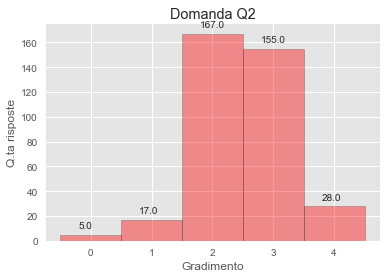

In [25]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q2'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='red')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q2')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [26]:
print("Domanda Q2: " + domande[1])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q2'].count()))
print("Media: " + str(round(dataset['Q2'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q2'].std(),2)))


Domanda Q2: Come valutate il rapporto qualità/prezzo dei prodotti ALCAS rispetto alla concorrenza?
Possibili risposte:
	0. Molto insoddisfacente --> 5.0
	1. Insoddisfacente --> 17.0
	2. Abbastanza soddisfacente --> 167.0
	3. Soddisfacente --> 155.0
	4. Molto soddisfacente --> 28.0

Clienti che hanno risposto: 372
Media: 2.49
Deviazione standard: 0.76


***

## Domanda n.3
#### __ Quanto è importante il prezzo per la sua azienda nella scelta di questo tipo di prodotto? __

In [27]:
u, inv = np.unique(dataset['Q3'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

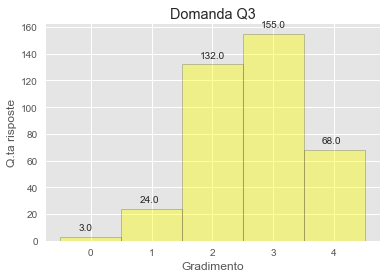

In [28]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q3'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='yellow')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q3')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [29]:
print("Domanda Q3: " + domande[2])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction_Q3[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q3'].count()))
print("Media: " + str(round(dataset['Q3'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q3'].std(),2)))


Domanda Q3: Quanto è importante il prezzo per la sua azienda nella scelta di questo tipo di prodotto?
Possibili risposte:
	0. Per nulla importante --> 3.0
	1. Non tanto importante --> 24.0
	2. Abbastanza importante --> 132.0
	3. Molto importante --> 155.0
	4. Estremamente importante --> 68.0

Clienti che hanno risposto: 382
Media: 2.68
Deviazione standard: 0.86


***

## Domanda n.4
#### __ Qual''è la vostra valutazione dei tempi di consegna rispetto alle vostre esigenze? __

In [30]:
u, inv = np.unique(dataset['Q4'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

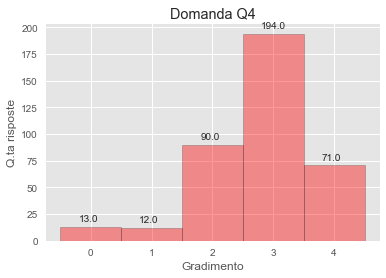

In [31]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q4'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='red')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q4')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [32]:
print("Domanda Q4: " + domande[3])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q4'].count()))
print("Media: " + str(round(dataset['Q4'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q4'].std(),2)))


Domanda Q4: Qualè la vostra valutazione dei tempi di consegna rispetto alle vostre esigenze?
Possibili risposte:
	0. Molto insoddisfacente --> 13.0
	1. Insoddisfacente --> 12.0
	2. Abbastanza soddisfacente --> 90.0
	3. Soddisfacente --> 194.0
	4. Molto soddisfacente --> 71.0

Clienti che hanno risposto: 380
Media: 2.78
Deviazione standard: 0.9


***

## Domanda n.5
#### __ Qual''è la vostra valutazione del materiale di supporto tecnico e normativo fornito? __

In [33]:
u, inv = np.unique(dataset['Q5'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

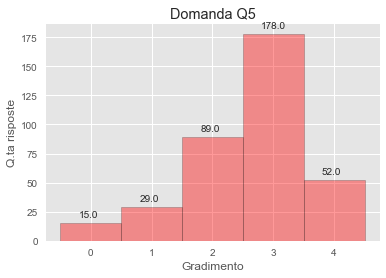

In [34]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q5'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='red')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q5')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [35]:
print("Domanda Q5: " + domande[4])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q5'].count()))
print("Media: " + str(round(dataset['Q5'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q5'].std(),2)))


Domanda Q5: Qualè la vostra valutazione del materiale di supporto tecnico e normativo fornito?
Possibili risposte:
	0. Molto insoddisfacente --> 15.0
	1. Insoddisfacente --> 29.0
	2. Abbastanza soddisfacente --> 89.0
	3. Soddisfacente --> 178.0
	4. Molto soddisfacente --> 52.0

Clienti che hanno risposto: 363
Media: 2.61
Deviazione standard: 0.97


***

## Domanda n.6
#### __ Come ritenete la capacità di ALCAS di gestire le richieste del cliente? __

In [36]:
u, inv = np.unique(dataset['Q6'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

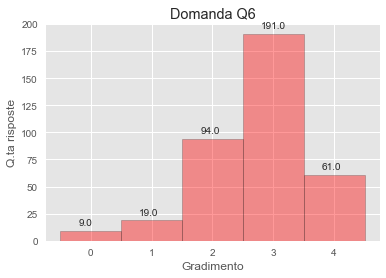

In [37]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q6'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='red')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q6')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [38]:
print("Domanda Q6: " + domande[5])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q6'].count()))
print("Media: " + str(round(dataset['Q6'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q6'].std(),2)))


Domanda Q6: Come ritenete la capacità di ALCAS di gestire le richieste del cliente?
Possibili risposte:
	0. Molto insoddisfacente --> 9.0
	1. Insoddisfacente --> 19.0
	2. Abbastanza soddisfacente --> 94.0
	3. Soddisfacente --> 191.0
	4. Molto soddisfacente --> 61.0

Clienti che hanno risposto: 374
Media: 2.74
Deviazione standard: 0.88


***

## Domanda n.7
#### __ Come giudica la qualità di nostri prodotti? __

In [39]:
u, inv = np.unique(dataset['Q7'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

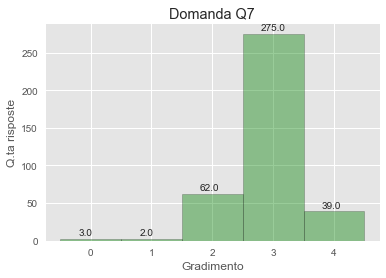

In [40]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q7'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='green')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q7')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [41]:
print("Domanda Q7: " + domande[6])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction_Q7[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q7'].count()))
print("Media: " + str(round(dataset['Q7'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q7'].std(),2)))


Domanda Q7: Come giudica la qualità di nostri prodotti?
Possibili risposte:
	0. Bassissima qualità --> 3.0
	1. Bassa qualità --> 2.0
	2. Media qualità --> 62.0
	3. Alta qualità --> 275.0
	4. Altissima qualità --> 39.0

Clienti che hanno risposto: 381
Media: 2.91
Deviazione standard: 0.59


***

## Domanda n.8
#### __ Nel complesso, come valuta la sua esperienza con l''assistenza clienti? __

In [42]:
u, inv = np.unique(dataset['Q8'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

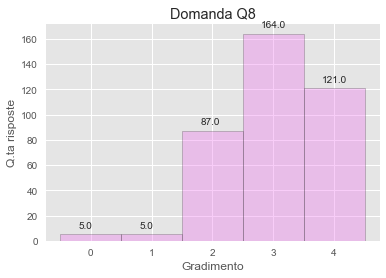

In [43]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q8'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='violet')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q8')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [44]:
print("Domanda Q8: " + domande[7])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction_Q8[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q8'].count()))
print("Media: " + str(round(dataset['Q8'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q8'].std(),2)))


Domanda Q8: Nel complesso, come valuta la sua esperienza con lassistenza clienti?
Possibili risposte:
	0. Molto negativa --> 5.0
	1. Abbastanza negativa --> 5.0
	2. Neutra --> 87.0
	3. Abbastanza positiva --> 164.0
	4. Molto positiva --> 121.0

Clienti che hanno risposto: 382
Media: 3.02
Deviazione standard: 0.85


***

## Domanda n.9
#### __ Come valutate la tempestività di ALCAS nella gestione di azioni correttive e di miglioramento? __

In [45]:
u, inv = np.unique(dataset['Q9'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

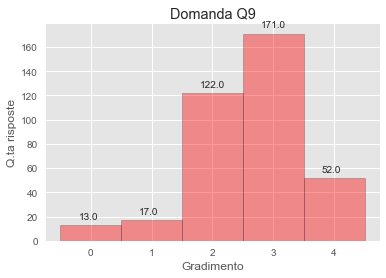

In [46]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q9'].dropna().values, align='mid', bins=np.arange(6)-0.5, alpha=0.4, edgecolor='black', color='red')
for i in range(5):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q9')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [47]:
print("Domanda Q9: " + domande[8])
print("Possibili risposte:")
for i in range(0,5):
    print("\t"+str(i)+". "+inv_ordered_satisfaction[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q9'].count()))
print("Media: " + str(round(dataset['Q9'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q9'].std(),2)))


Domanda Q9: Come valutate la tempestività di ALCAS nella gestione di azioni correttive e di miglioramento?
Possibili risposte:
	0. Molto insoddisfacente --> 13.0
	1. Insoddisfacente --> 17.0
	2. Abbastanza soddisfacente --> 122.0
	3. Soddisfacente --> 171.0
	4. Molto soddisfacente --> 52.0

Clienti che hanno risposto: 375
Media: 2.62
Deviazione standard: 0.9


***

# Domanda n.10
#### __ Da quanto tempo siete clienti della nostra azienda? __

In [48]:
u, inv = np.unique(dataset['Q10'].dropna().values, return_inverse=True)
counts = np.bincount(inv)
#u, inv, counts, type(inv[0])

Text(0,0.5,'Q.ta risposte')

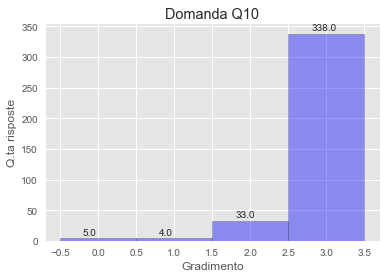

In [49]:
#plt.figure(figsize=(8,6))
arr=plt.hist(dataset['Q10'].dropna().values, align='mid', bins=np.arange(5)-0.5, alpha=0.4, edgecolor='black', color='blue')
for i in range(4):
    plt.text(arr[1][i]+0.3,arr[0][i]+5,str(arr[0][i]))
#plt.legend(prop={'size': 10})
plt.title('Domanda Q10')
plt.xlabel('Gradimento')
plt.ylabel('Q.ta risposte')

In [50]:
print("Domanda Q10: " + domande[9])
print("Possibili risposte:")
for i in range(0,4):
    print("\t"+str(i)+". "+inv_ordered_satisfaction_Q10[i]+" --> " + str(arr[0][i]))
print()
print("Clienti che hanno risposto: " + str(dataset['Q10'].count()))
print("Media: " + str(round(dataset['Q10'].mean(),2)))
print("Deviazione standard: " + str(round(dataset['Q10'].std(),2)))


Domanda Q10: Da quanto tempo siete clienti della nostra azienda?
Possibili risposte:
	0. Meno di sei mesi --> 5.0
	1. Da sei mesi a un anno --> 4.0
	2. 1 - 3 anni --> 33.0
	3. Più di 3 anni --> 338.0

Clienti che hanno risposto: 380
Media: 2.85
Deviazione standard: 0.48


***